C:\Users\hp\AppData\Local\Temp\ipykernel_20656\4046319490.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(0, inplace=True)


<Figure size 1000x600 with 0 Axes>

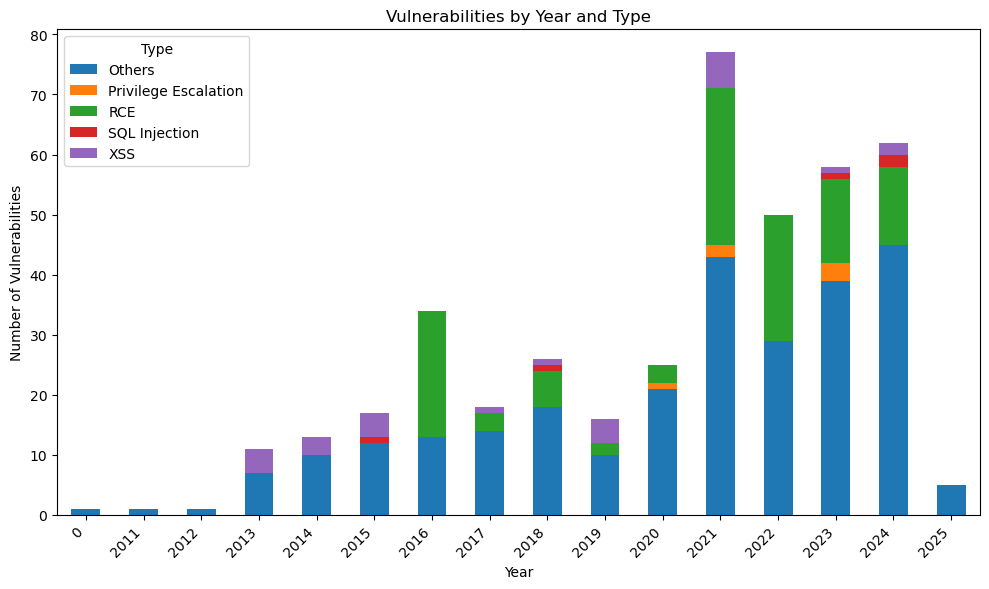

Type     Others  Privilege Escalation        RCE  SQL Injection        XSS
count  16.00000             16.000000  16.000000       16.00000  16.000000
mean   16.81250              0.375000   6.812500        0.31250   1.625000
std    14.75226              0.885061   9.086391        0.60208   1.962142
min     1.00000              0.000000   0.000000        0.00000   0.000000
25%     6.50000              0.000000   0.000000        0.00000   0.000000
50%    12.50000              0.000000   2.500000        0.00000   1.000000
75%    23.00000              0.000000  13.250000        0.25000   3.250000
max    45.00000              3.000000  26.000000        2.00000   6.000000


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 读取分类后的CSV文件
df = pd.read_csv('nodejs_cve_data_with_types.csv', encoding='ISO-8859-1')

# 提取漏洞名称中的年份
def extract_year(cve_name):
    match = re.search(r'CVE-(\d{4})', cve_name)
    if match:
        return int(match.group(1))  # 提取并返回年份
    return None  # 如果没有匹配到年份，返回 None

# 创建一个新列 'Year'，存储漏洞的发布年份
df['Year'] = df['Name'].apply(extract_year)

# 处理缺失值：将 'NaN' 填充为 0 或删除含有 'NaN' 的行
df['Year'].fillna(0, inplace=True)

# 确保年份列是整数类型
df['Year'] = df['Year'].astype(int)

# 统计每年每种类型的漏洞数量
type_year_counts = df.groupby(['Year', 'Type']).size().unstack(fill_value=0)

# 第一个图表：展示每年不同漏洞类型的数量（堆叠柱状图）
plt.figure(figsize=(10, 6))
type_year_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Vulnerabilities')
plt.title('Vulnerabilities by Year and Type')
plt.xticks(rotation=45, ha='right')  # 设置x轴标签倾斜角度
plt.tight_layout()
plt.show()

# 步骤 1: 检查数据的基本统计信息，找出可能的异常值
print(type_year_counts.describe())

# 步骤 2: 删除年份小于2000的异常数据（根据实际情况调整）
df = df[df['Year'] >= 2000]

# 统计每年发布的漏洞数量（删除异常值后的）
year_counts = df['Year'].value_counts().sort_index()

# 步骤 3: 对漏洞数量进行对数变换，避免极端值的影响
year_counts_log = np.log1p(year_counts)  # 对数变换

# 准备数据：年份（X）和经过对数变换后的漏洞数量（Y）
years = year_counts.index.values.reshape(-1, 1)  # X: 年份
vuln_counts_log = year_counts_log.values  # Y: 对数变换后的漏洞数量
